In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import wordnet as wn
from collections import defaultdict
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 文本处理

In [3]:
data = pd.read_excel(r"/home/hxjiang/Pythonworkspace/patent/sample20000/after_process.xlsx", encoding='utf-8')

In [30]:
data.head(1)

,abstract,application_id,claims,claims_add1,location,title,abstract_sen_count,claims_sen_count,abstract_final,abstract_count,claims_final,claims_count
0,"['An', 'improved', 'heat', 'protective', 'plan...",12830339,"['1', '.', 'A', 'plant', 'wrap', 'for', 'surro...",NaN,2012/ipa120105/US20120000122A1.xml,HEAT PROTECTIVE PLANT WRAP,4,6,"['An', 'improved', 'heat', 'protective', 'plan...",74,"['A', 'plant', 'wrap', 'surround', 'plant', 'c...",125


In [31]:
len(data)

5000

## 将claims补充完整

In [67]:
for index, claims in enumerate(tqdm(data['claims_add1'], ncols=60)):
    if type(claims) == str:
        claims = data['claims'][index] + " " + claims
        data.loc[index, 'claims'] = claims

100%|█████████████| 20000/20000 [00:00<00:00, 122452.67it/s]


In [45]:
for index, claims in enumerate(tqdm(data['claims_add2'], ncols=60)):
    if type(claims) == str:
        claims = data['claims'][index] + " " + claims
        data.loc[index, 'claims'] = claims

100%|███████████████| 7769/7769 [00:00<00:00, 508521.48it/s]


## 分句

In [68]:
abstract_max_len = []
for index, abstract in enumerate(tqdm(data['abstract'], ncols=70)):
    tokens = sent_tokenize(abstract)
    token_list = []
    for token in tokens:
        if len(token) < 3:
            pass
        else:
            token_list.append(token)
    abstract_max_len.append(len(token_list))
    data.loc[index, 'abstract_sen_count'] = len(token_list)

100%|█████████████████████████| 20000/20000 [00:15<00:00, 1251.94it/s]


In [69]:
claims_max_len = []
for index, claims in enumerate(tqdm(data['claims'], ncols=70)):
    tokens = sent_tokenize(claims)
    token_list = []
    for token in tokens:
        if len(token) < 10:
            pass
        else:
            token_list.append(token)
    claims_max_len.append(len(token_list))
    data.loc[index, 'claims_sen_count'] = len(token_list)

100%|██████████████████████████| 20000/20000 [00:52<00:00, 379.29it/s]


## 分词

### abstract

In [70]:
data['abstract'].dropna(inplace=True)
# data['abstract'] = [entry.lower() for entry in data['abstract']]
data['abstract'] = [word_tokenize(entry) for entry in data['abstract']]

In [71]:
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

len_abstract = []
for index, entry in enumerate(tqdm(data['abstract'], ncols=70)):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])  # 对这三类做词形还原
            Final_words.append(word_Final)
    len_abstract.append(len(Final_words))
    data.loc[index, 'abstract_final'] = str(Final_words)
    data.loc[index, 'abstract_count'] = len(Final_words)

100%|███████████████████████████| 20000/20000 [09:07<00:00, 36.55it/s]


### claims

In [72]:
data['claims'].dropna(inplace=True)
# data['claims'] = [entry.lower() for entry in data['claims']]
data['claims'] = [word_tokenize(entry) for entry in data['claims']]

In [73]:
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

len_claims = []
for index, entry in enumerate(tqdm(data['claims'], ncols=70)):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])  # 对这三类做词形还原
            Final_words.append(word_Final)
    len_claims.append(len(Final_words))
    data.loc[index, 'claims_final'] = str(Final_words)
    data.loc[index, 'claims_count'] = len(Final_words)

100%|█████████████████████████| 20000/20000 [1:43:00<00:00,  3.24it/s]


## 文本长度分布

In [6]:
def status(x):
    return pd.Series([x.count(), x.sum(), x.min(), x.idxmin(), x.quantile(.25), x.median(),
                      x.quantile(.75), x.quantile(.90), x.quantile(.95), x.quantile(.99), x.mean(), 
                      x.max(), x.idxmax(), x.mode(), x.mad(), x.var(), x.std(), x.skew(), x.kurt()], 
                     index=['非空数', '求和', '最小值', '最小值位置', '25%分位数', '中位数', '75%分位数', 
                            '90%分位数', '95%分位数', '99%分位数', '均值', '最大值', '最大值位数', '众数', 
                            '平均绝对偏差', '方差', '标准差', '偏度', '峰度'])

### sample5000

In [15]:
data.to_excel(r"/home/hxjiang/Pythonworkspace/patent/sample5000/after_process.xlsx", encoding='utf-8')

In [16]:
result_data = pd.read_excel(r"/home/hxjiang/Pythonworkspace/patent/sample5000/sample.xlsx", encoding='utf-8')

In [17]:
result_data.head(2)

,application_id,cpc_class,location,result
3929,12830339,A-01-G-13,2012/ipa120105/US20120000122A1.xml,0
1848,13044144,C-09-K-3,2012/ipa120105/US20120000137A1.xml,1


In [19]:
df = pd.DataFrame(np.array([len_abstract, len_claims, abstract_max_len, claims_max_len, result_data['result']]).T, columns=[
                  'number_of_abstract_words', 'number_of_claims_words', 'number_of_abstract_senteces', 'number_of_claims_senteces', 'result'])
df.apply(status)

,number_of_abstract_words,number_of_claims_words,number_of_abstract_senteces,number_of_claims_senteces,result
非空数,5000,5000,5000,5000,5000
求和,316473,2676360,16913,92112,2500
最小值,4,8,1,1,0
最小值位置,4023,1531,5,91,0
25%分位数,45,303,2,12,0
中位数,64,465,3,19,0.5
75%分位数,82,675.25,5,21,1
90%分位数,92,920.1,6,29,1
95%分位数,98,1153.1,7,37,1
99%分位数,122,1877.09,9,58.01,1


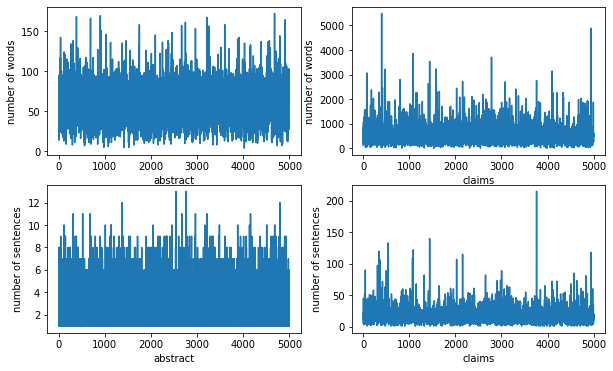

In [20]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.plot(df['number_of_abstract_words'].index, df['number_of_abstract_words'].values)
plt.ylabel("number of words")
plt.xlabel("abstract")

plt.subplot(222)
plt.plot(df['number_of_claims_words'].index, df['number_of_claims_words'].values)
plt.ylabel("number of words")
plt.xlabel("claims")

plt.subplot(223)
plt.plot(df['number_of_abstract_senteces'].index, df['number_of_abstract_senteces'].values)
plt.ylabel("number of sentences")
plt.xlabel("abstract")

plt.subplot(224)
plt.plot(df['number_of_claims_senteces'].index, df['number_of_claims_senteces'].values)
plt.ylabel("number of sentences")
plt.xlabel("claims")

plt.show()

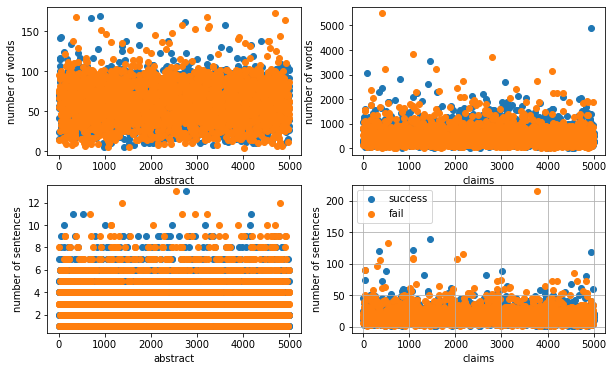

In [21]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(221)
df1 = df[df['result'] == 1]
plt.scatter(df1.index, df1['number_of_abstract_words'], label="success")
df2 = df[df['result'] == 0]
plt.scatter(df2.index, df2['number_of_abstract_words'], label="fail")
plt.ylabel("number of words")
plt.xlabel("abstract")

plt.subplot(222)
df1 = df[df['result'] == 1]
plt.scatter(df1.index, df1['number_of_claims_words'], label="success")
df2 = df[df['result'] == 0]
plt.scatter(df2.index, df2['number_of_claims_words'], label="fail")
plt.ylabel("number of words")
plt.xlabel("claims")

plt.subplot(223)
df1 = df[df['result'] == 1]
plt.scatter(df1.index, df1['number_of_abstract_senteces'], label="success")
df2 = df[df['result'] == 0]
plt.scatter(df2.index, df2['number_of_abstract_senteces'], label="fail")
plt.ylabel("number of sentences")
plt.xlabel("abstract")

plt.subplot(224)
df1 = df[df['result'] == 1]
plt.scatter(df1.index, df1['number_of_claims_senteces'], label="success")
df2 = df[df['result'] == 0]
plt.scatter(df2.index, df2['number_of_claims_senteces'], label="fail")
plt.ylabel("number of sentences")
plt.xlabel("claims")

plt.legend()
plt.grid()
plt.show()

### sample10000

In [44]:
data.to_excel(r"/home/hxjiang/Pythonworkspace/patent/sample10000/after_process.xlsx", encoding='utf-8')

In [45]:
result_data = pd.read_excel(r"/home/hxjiang/Pythonworkspace/patent/sample10000/sample.xlsx", encoding='utf-8')

In [46]:
result_data.head(2)

,application_id,cpc_class,location,result
1805,13136962,A-61-G-17,2012/ipa120105/US20120000044A1.xml,1
1821,13229569,B-23-P-13,2012/ipa120105/US20120000073A1.xml,1


In [47]:
df = pd.DataFrame(np.array([len_abstract, len_claims, abstract_max_len, claims_max_len, result_data['result']]).T, columns=[
                  'number_of_abstract_words', 'number_of_claims_words', 'number_of_abstract_senteces', 'number_of_claims_senteces', 'result'])
df.apply(status)

,number_of_abstract_words,number_of_claims_words,number_of_abstract_senteces,number_of_claims_senteces,result
非空数,10000,10000,10000,10000,10000
求和,634026,5441699,33566,183505,5000
最小值,4,8,1,1,0
最小值位置,8038,3379,0,62,2
25%分位数,46,312.75,2,11.75,0
中位数,64,472,3,19,0.5
75%分位数,81,677,5,21,1
90%分位数,92,939,6,29,1
95%分位数,98,1180.05,7,36,1
99%分位数,125,1920.01,9,59,1


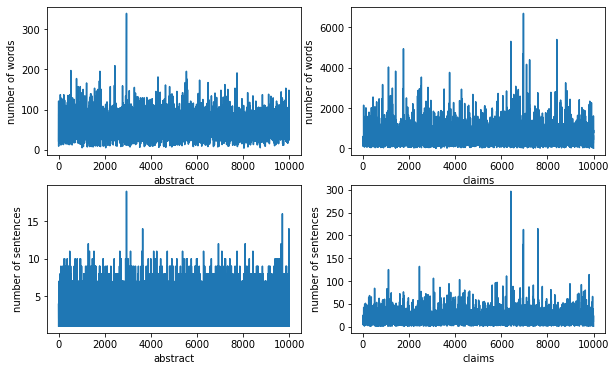

In [48]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.plot(df['number_of_abstract_words'].index, df['number_of_abstract_words'].values)
plt.ylabel("number of words")
plt.xlabel("abstract")

plt.subplot(222)
plt.plot(df['number_of_claims_words'].index, df['number_of_claims_words'].values)
plt.ylabel("number of words")
plt.xlabel("claims")

plt.subplot(223)
plt.plot(df['number_of_abstract_senteces'].index, df['number_of_abstract_senteces'].values)
plt.ylabel("number of sentences")
plt.xlabel("abstract")

plt.subplot(224)
plt.plot(df['number_of_claims_senteces'].index, df['number_of_claims_senteces'].values)
plt.ylabel("number of sentences")
plt.xlabel("claims")

plt.show()

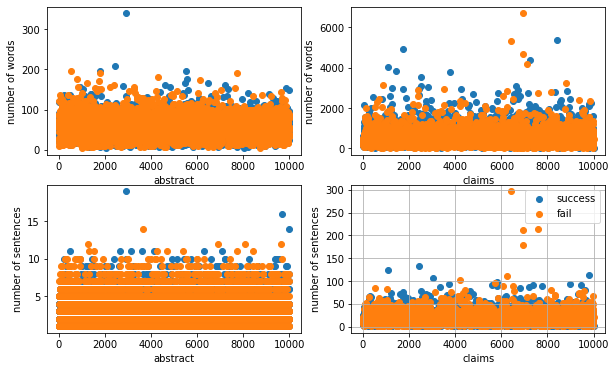

In [49]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(221)
df1 = df[df['result'] == 1]
plt.scatter(df1.index, df1['number_of_abstract_words'], label="success")
df2 = df[df['result'] == 0]
plt.scatter(df2.index, df2['number_of_abstract_words'], label="fail")
plt.ylabel("number of words")
plt.xlabel("abstract")

plt.subplot(222)
df1 = df[df['result'] == 1]
plt.scatter(df1.index, df1['number_of_claims_words'], label="success")
df2 = df[df['result'] == 0]
plt.scatter(df2.index, df2['number_of_claims_words'], label="fail")
plt.ylabel("number of words")
plt.xlabel("claims")

plt.subplot(223)
df1 = df[df['result'] == 1]
plt.scatter(df1.index, df1['number_of_abstract_senteces'], label="success")
df2 = df[df['result'] == 0]
plt.scatter(df2.index, df2['number_of_abstract_senteces'], label="fail")
plt.ylabel("number of sentences")
plt.xlabel("abstract")

plt.subplot(224)
df1 = df[df['result'] == 1]
plt.scatter(df1.index, df1['number_of_claims_senteces'], label="success")
df2 = df[df['result'] == 0]
plt.scatter(df2.index, df2['number_of_claims_senteces'], label="fail")
plt.ylabel("number of sentences")
plt.xlabel("claims")

plt.legend()
plt.grid()
plt.show()

### sample200000

In [74]:
data.to_excel(r"/home/hxjiang/Pythonworkspace/patent/sample20000/after_process.xlsx", encoding='utf-8')

In [32]:
result_data = pd.read_excel(r"/home/hxjiang/Pythonworkspace/patent/sample5000/sample.xlsx", encoding='utf-8')

In [33]:
result_data.head(2)

,application_id,cpc_class,location,result
3929,12830339,A-01-G-13,2012/ipa120105/US20120000122A1.xml,0
1848,13044144,C-09-K-3,2012/ipa120105/US20120000137A1.xml,1


In [34]:
df = pd.DataFrame(np.array([data['abstract_count'], data['claims_count'], data['abstract_sen_count'], data['claims_sen_count'], result_data['result']]).T, columns=[
                  'number_of_abstract_words', 'number_of_claims_words', 'number_of_abstract_senteces', 'number_of_claims_senteces', 'result'])
df.apply(status)

,number_of_abstract_words,number_of_claims_words,number_of_abstract_senteces,number_of_claims_senteces,result
非空数,5000,5000,5000,5000,5000
求和,316473,2676360,16913,92112,2500
最小值,4,8,1,1,0
最小值位置,4023,1531,5,91,0
25%分位数,45,303,2,12,0
中位数,64,465,3,19,0.5
75%分位数,82,675.25,5,21,1
90%分位数,92,920.1,6,29,1
95%分位数,98,1153.1,7,37,1
99%分位数,122,1877.09,9,58.01,1


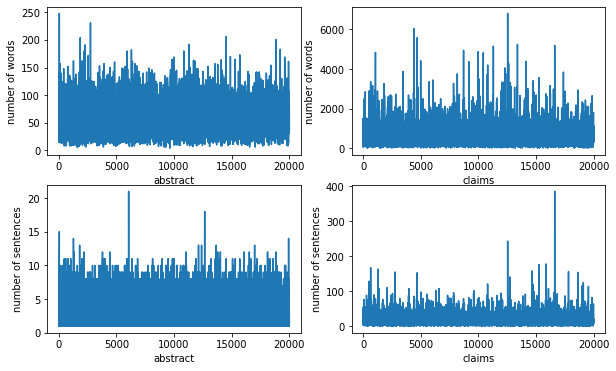

In [27]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.plot(df['number_of_abstract_words'].index, df['number_of_abstract_words'].values)
plt.ylabel("number of words")
plt.xlabel("abstract")

plt.subplot(222)
plt.plot(df['number_of_claims_words'].index, df['number_of_claims_words'].values)
plt.ylabel("number of words")
plt.xlabel("claims")

plt.subplot(223)
plt.plot(df['number_of_abstract_senteces'].index, df['number_of_abstract_senteces'].values)
plt.ylabel("number of sentences")
plt.xlabel("abstract")

plt.subplot(224)
plt.plot(df['number_of_claims_senteces'].index, df['number_of_claims_senteces'].values)
plt.ylabel("number of sentences")
plt.xlabel("claims")

plt.show()

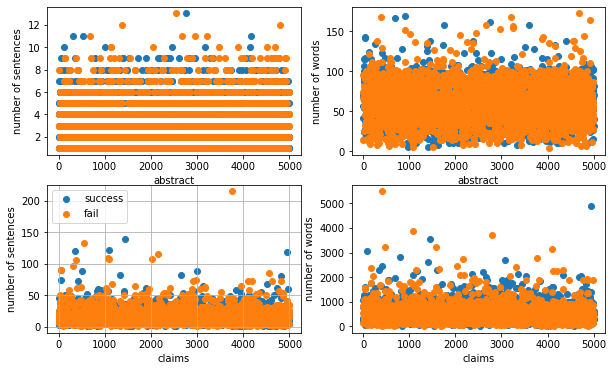

In [35]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(222)
df1 = df[df['result'] == 1]
plt.scatter(df1.index, df1['number_of_abstract_words'], label="success")
df2 = df[df['result'] == 0]
plt.scatter(df2.index, df2['number_of_abstract_words'], label="fail")
plt.ylabel("number of words")
plt.xlabel("abstract")

plt.subplot(224)
df1 = df[df['result'] == 1]
plt.scatter(df1.index, df1['number_of_claims_words'], label="success")
df2 = df[df['result'] == 0]
plt.scatter(df2.index, df2['number_of_claims_words'], label="fail")
plt.ylabel("number of words")
plt.xlabel("claims")

plt.subplot(221)
df1 = df[df['result'] == 1]
plt.scatter(df1.index, df1['number_of_abstract_senteces'], label="success")
df2 = df[df['result'] == 0]
plt.scatter(df2.index, df2['number_of_abstract_senteces'], label="fail")
plt.ylabel("number of sentences")
plt.xlabel("abstract")

plt.subplot(223)
df1 = df[df['result'] == 1]
plt.scatter(df1.index, df1['number_of_claims_senteces'], label="success")
df2 = df[df['result'] == 0]
plt.scatter(df2.index, df2['number_of_claims_senteces'], label="fail")
plt.ylabel("number of sentences")
plt.xlabel("claims")

plt.legend()
plt.grid()
plt.show()

# TF-IDF

In [4]:
data.head(1)

,abstract,application_id,claims,location,title,claims_add1,abstract_sen_count,claims_sen_count,abstract_final,abstract_count,claims_final,claims_count
0,"['The', 'present', 'invention', 'provides', 'a...",13027052,"['1', '.', 'A', 'hand-utility', 'interface', '...",2012/ipa120105/US20120000001A1.xml,HAND UTILITY INTERFACE,NaN,2,29,"['The', 'present', 'invention', 'provide', 'in...",34,"['A', 'interface', 'use', 'protect', 'users', ...",383


In [5]:
len(data)

20000

## abstract

In [16]:
Tfidf_vect_abs = TfidfVectorizer(max_features=72)
Tfidf_vect_abs.fit(data['abstract_final'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=72,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [17]:
Tfidf_feature_abs = Tfidf_vect_abs.transform(data['abstract_final'])
Tfidf_feature_abs

<20000x72 sparse matrix of type '<class 'numpy.float64'>'
	with 188834 stored elements in Compressed Sparse Row format>

In [18]:
df_abs = pd.DataFrame(Tfidf_feature_abs.toarray())
df_abs.head(3)

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.0,0.000000,0.0,0.0,0.337493,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.126042,0.0,0.0,0.0,0.413337,0.0,0.0,0.273811,0.0
1,0.0,0.301915,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.450675,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.522971,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [19]:
df_abs.shape

(20000, 72)

In [20]:
# 保存
df_abs.to_excel("/home/hxjiang/Pythonworkspace/patent/sample20000/abstract_TF-IDF_300d.xlsx")

## claims

In [21]:
Tfidf_vect_claims = TfidfVectorizer(max_features=72)
Tfidf_vect_claims.fit(data['claims_final'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=72,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [22]:
Tfidf_feature_claims = Tfidf_vect_claims.transform(data['claims_final'])
Tfidf_feature_claims

<20000x72 sparse matrix of type '<class 'numpy.float64'>'
	with 402939 stored elements in Compressed Sparse Row format>

In [23]:
df_claims = pd.DataFrame(Tfidf_feature_claims.toarray())
df_claims.head(3)

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.619187,0.0,0.0,0.0,0.561849,0.0,0.0,0.334399,0.0,0.057113,...,0.0,0.026771,0.000000,0.0,0.0,0.000000,0.092130,0.034816,0.0,0.319655
1,0.233767,0.0,0.0,0.0,0.027307,0.0,0.0,0.126249,0.0,0.104094,...,0.0,0.078070,0.000000,0.0,0.0,0.011382,0.016792,0.000000,0.0,0.031371
2,0.481694,0.0,0.0,0.0,0.000000,0.0,0.0,0.260144,0.0,0.201244,...,0.0,0.000000,0.675886,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.173284


In [24]:
df_claims.shape

(20000, 72)

In [25]:
# 保存
df_claims.to_excel("/home/hxjiang/Pythonworkspace/patent/sample20000/claims_TF-IDF_300d.xlsx")